# Research Summary for May 30th 2023

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

plt.rcParams["mathtext.fontset"] = 'cm'

def genPlot(fname,df,l,m="o"):
    plt.plot(df["time"],df["fidelity"],marker=m,markersize=5)
    plt.xlabel('$T/T_{min}$',fontsize=16)
    plt.ylabel('$F$',fontsize=16)
    plt.title(fname)
    plt.grid(which='major', linestyle='-', linewidth='0.5')
    plt.grid(which='minor', linestyle='dotted', linewidth='0.5')
    plt.minorticks_on()
    plt.legend(l)

Here we will look at the analytic speed-up derived for the $iSWAP$ gate and see whether the numerics can generate the same speed-up. This was previously explored, but no significant speed-up was seen. Our analytical protocol only has 3 segments, and thus we will fix our segments to 3 while testing different combinations of drives to see if the $\sqrt{2}$ speed up is achievable. 

Now we will use the derived coupling gate for our $iSWAP$ gate protocol with both qubit and qutrit drives. 

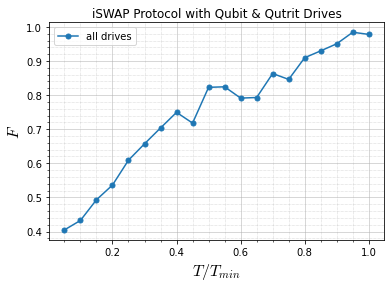

In [2]:
allDrives_DF = pd.read_csv("../Past_Files/Past_Data/Data/iSWAP_Protocol/all.csv",names=["fidelity","time"])
allDrives_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])

Here we observe that there does not seem to be a factor of a $\sqrt{2}$ speed up. Also there are some suprising non-smoothness for our graph. With a large amount of iterations and random seem averaging, we mostly smooth points for all plots. This might hint at that the numerics are having difficulty stabilizing on a minimum infidelity count. This matches our previous finding for the $iSWAP$ gate. Now lets look at if we can find a speed-up if there are only qutrit drives ($X$ and $Y$ drives for the $|1>\to|2>$ transition)

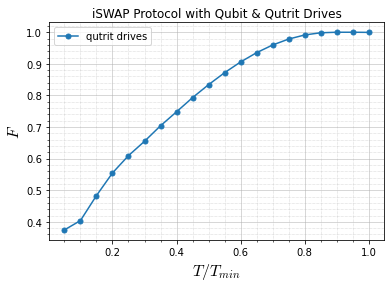

In [3]:
qutrits_DF = pd.read_csv("../Past_Files/Past_Data/Data/iSWAP_Protocol/qutrits.csv",names=["fidelity","time"])
qutrits_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["qutrit drives"])

Here it seems as though we do see a speed-up! This is quite suprising as with the qubit and qutrit drives, there was no visible speed-up. Plotting the two graphs, we have

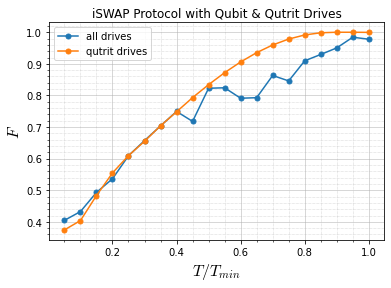

In [4]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])

Thus our speed up is visually verified. Also note that the numerical calculation with all drives matches our qutrit drive case until around $T = \sim0.5T_{min}$. This may indicate that the speed up solution is sparse and our numerics are having difficulty finding it for larger time steps.

For our last test, we will see if we can achieve a speed-up for only a $Y$ qutrit drive. This is the only necessary drive for our analytical protocol. 

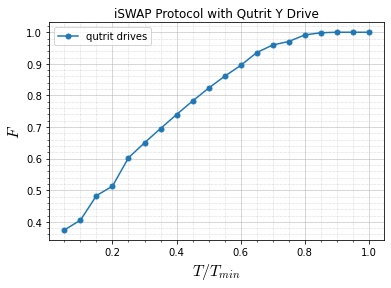

In [5]:
yquit_DF = pd.read_csv("../Past_Files/Past_Data/Data/iSWAP_Protocol/y_qutrit.csv",names=["fidelity","time"])
yquit_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP Protocol with Qutrit Y Drive",yquit_DF,["qutrit drives"])

Initially we can see that we generate the $\sqrt{2}$ speed-up seen in the qutrit drive case. Combinding all plots, we have

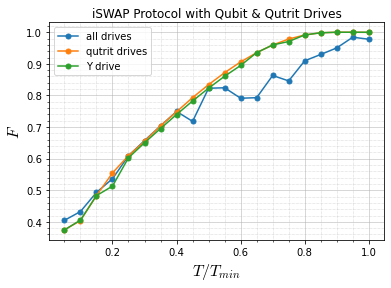

In [6]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",yquit_DF,["all drives","qutrit drives","Y drive"])

Thus we see that if we have the qutrit drives (either both or only the $Y$ drive), we achieve the speed-up seen in the analytical protocol. Suprisingly we do not see this when we have both qubit and qutrit drives. This lack of speed-up may be due to the larger amount of parameters used in the qubit & qutrit drives. The optimizer may have difficulty with larger amount of parameters. Note that we have are using Stochastic Gradient Descent and other optimizers may perform differently. 

We have compared the $iSWAP$ protocol with different types of drives. Now let's compare these protocols to the qubit system with $X$ and $Y$ drives with couplings strengths $g= 1$ and $g=\sqrt{2}$ respectably. 

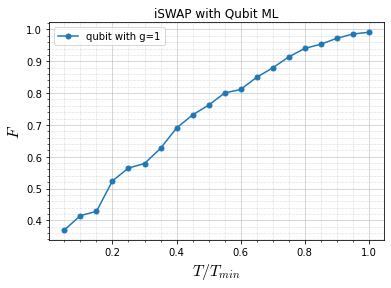

In [7]:
qubits_DF = pd.read_csv("../Past_Files/Past_Data/Data/iSWAP_Protocol/qubit.csv",names=["fidelity","time"])
qubits_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])

This is to be expected with saturation of the speed limit at $T_{min}=1$. Note that we are not putting a cap on the drive strength. Now let's look at the $g=\sqrt{2}$ coupling case. 

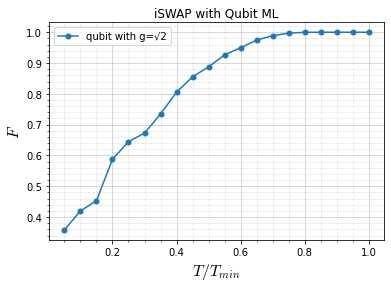

In [8]:
qubits_gR2_DF = pd.read_csv("../Past_Files/Past_Data/Data/iSWAP_Protocol/qubit_gRoot2.csv",names=["fidelity","time"])
qubits_gR2_DF.sort_values(by="time",inplace=True)
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["qubit with g=\u221A2"])

Plotting both the couplings strengths, we have 

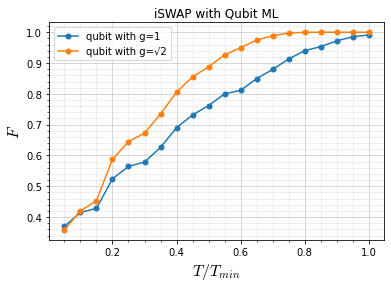

In [9]:
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["qubit with g=1","qubit with g=\u221A2"])

We see the expected speed up from increasing the respective coupling strength. Now let's compare this to our qutrit protocl 

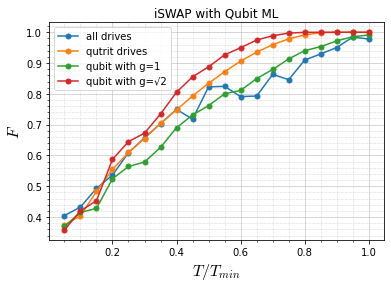

In [10]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
#genPlot("iSWAP Protocol with Qubit & Qutrit Drives",yquit_DF,["all drives","qutrit drives","Y drive"])
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2"])

While this graph is a little cluttered, it is the most hollistic comparison for the $iSWAP$ protocol. Note that I used the projection of our coupling matrix onto the qubit subspace as our coupling matrix for qubit numerics. Another thing to note is that the qubit with $g=\sqrt{2}$ is outperforms the qutrit protocol. This is bizarre as our qutrit should perform the same as the qubit with $g=\sqrt{2}$. This may be an issue on what the speed limits are for different gates with different coupling Hamiltonians are, but this is quite puzzling. Also the optimziation with both the qubit and qutrit drives for the $iSWAP$ protocol is actually underperforming from the $g=1$ qubit case. This is even more suprising as one would expect them to be the same. This may indicate how severe the effect of the large parameter space has on the optimizer. 

## CNOT Analysis

Here we will take a look at the dervied at $CNOT$ speed-up protocol. Looking at the numerics with both qubit and qutrit drives, we have

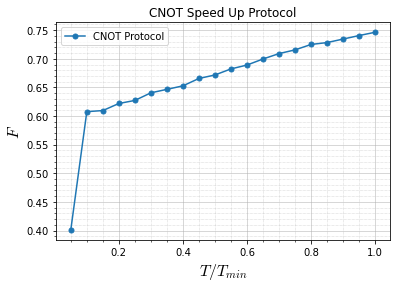

In [11]:
CNOT_all_protocol = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_CNOT_Protocol_M3_all_g1.csv",names=["fidelity","time"])
CNOT_all_protocol.sort_values(by="time",inplace=True)
genPlot("CNOT Speed Up Protocol",CNOT_all_protocol,["CNOT Protocol"])

Here we do not see any speed-up at all. But lets look at the case where we just have the qutrit drives. 

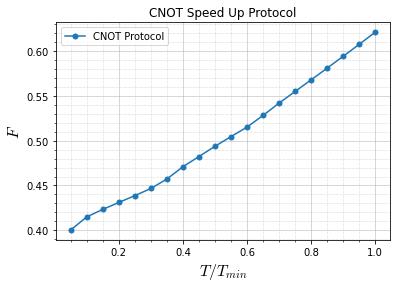

In [12]:
CNOT_all_protocol = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_CNOT_Protocol_M3_qtd_g1.csv",names=["fidelity","time"])
CNOT_all_protocol.sort_values(by="time",inplace=True)
genPlot("CNOT Speed Up Protocol",CNOT_all_protocol,["CNOT Protocol"])

While this graph is smooth, we do not see any speed up unforunately. 

Now lets purely look at the $CNOT$ gate in the context of qubit, qutrit, and the Ashabb coupling. First looking at the classic qubit case, we have

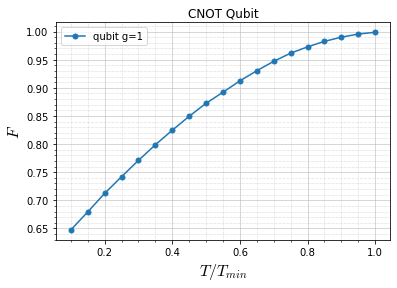

In [13]:
CNOT_DF = pd.read_csv("../Past_Files/Past_Data/Data/CNOT_Qubit/CNOT/CNOT_Qubit.csv",names=["fidelity","time"])
CNOT_DF.sort_values(by="time",inplace=True)
CNOT_DF = CNOT_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])

This plot looks as expected. Now let's look at the case with the Ashabb coupling. 

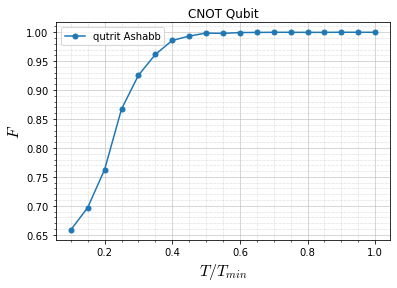

In [14]:
CNOT_A_DF = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_Ashabb_M8_all_g1.csv",names=["fidelity","time"])
CNOT_A_DF.sort_values(by="time",inplace=True)
CNOT_A_DF = CNOT_A_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_A_DF,["qutrit Ashabb"])

This matches our previous results. Plotting both we have

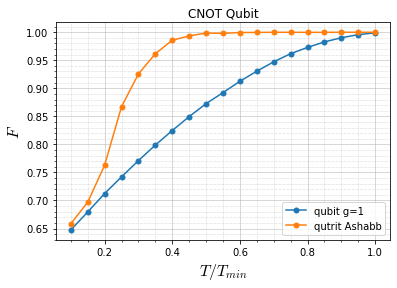

In [15]:
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_A_DF,["qubit g=1","qutrit Ashabb"])

Now let's look at the case where $g=3$ for the qubit optimization. 

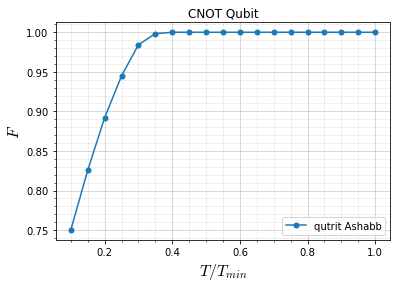

In [16]:
CNOT_g3_DF = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qubit_XX_M8_all_g3.csv",names=["fidelity","time"])
CNOT_g3_DF.sort_values(by="time",inplace=True)
CNOT_g3_DF = CNOT_g3_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_g3_DF,["qutrit Ashabb"])

This looks to be the expected behavior. Plotting everything, we have

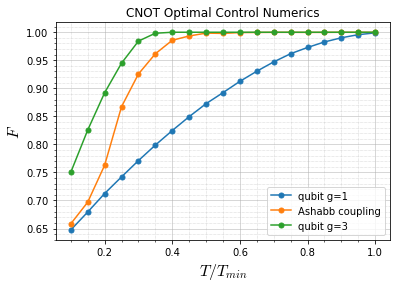

In [17]:
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_A_DF,["qutrit Ashabb","qubit g=1"])
genPlot("CNOT Optimal Control Numerics",CNOT_g3_DF,["qubit g=1","Ashabb coupling","qubit g=3"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_Comparison.pdf"), format="pdf")

Here we see that while the Ashabb Hamiltonian has an operator norm of 3, that it is still bounded by $g=3$. 

Now let's look at the qutrit optimizaiton and see if we achieve a speed up. 

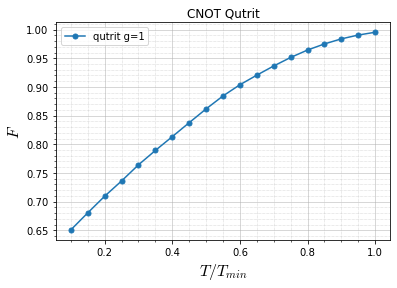

In [18]:
CNOT_qt_DF = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_XX_M8_all_g1.csv",names=["fidelity","time"])
CNOT_qt_DF.sort_values(by="time",inplace=True)
CNOT_qt_DF = CNOT_qt_DF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qutrit",CNOT_qt_DF,["qutrit g=1"])

Here we see no speed-up for the $CNOT$ gate with qutrit energy levels when compared to the qubit optimization. Graphing everything together, we have

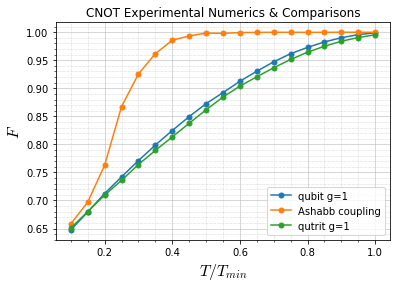

In [19]:
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_A_DF,["qutrit Ashabb","qubit g=1"])
#genPlot("CNOT Optimal Control Numerics",CNOT_g3_DF,["qubit g=1","Ashabb coupling","qubit g=3"])
genPlot("CNOT Experimental Numerics & Comparisons",CNOT_qt_DF,["qubit g=1","Ashabb coupling","qutrit g=1"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_Experimental.pdf"), format="pdf")

Now let's look at if we saturate the $iSWAP$ speed up protocol with segment numbers greater than 3. 

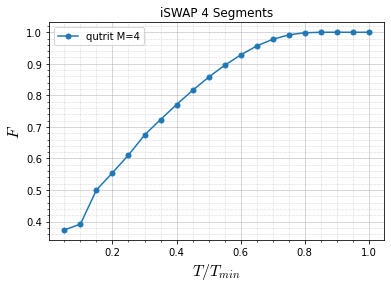

In [20]:
iSWAP_M4 = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_iSWAP_Protocol_M4_qtd_g1.csv",names=["fidelity","time"])
iSWAP_M4.sort_values(by="time",inplace=True)
genPlot("iSWAP 4 Segments",iSWAP_M4,["qutrit M=4"])

Here we do see a speed up for 4 segments! This indicates that our optimizer is not having less trouble with the segment number and more trouble with the increse in possible parameters. Just to be certain lets look at a 5 segment system 

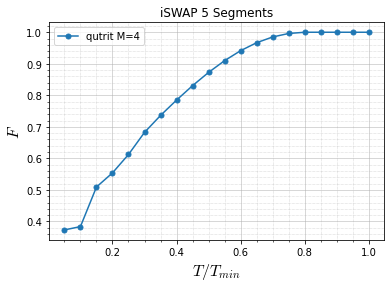

In [21]:
iSWAP_M5 = pd.read_csv("../Past_Files/Past_Data/Data/ML_Output/Qutrit_iSWAP_Protocol_M5_qtd_g1.csv",names=["fidelity","time"])
iSWAP_M5.sort_values(by="time",inplace=True)
genPlot("iSWAP 5 Segments",iSWAP_M5,["qutrit M=4"])

This is the same result! Now lets compare this to our original $iSWAP$ plots.

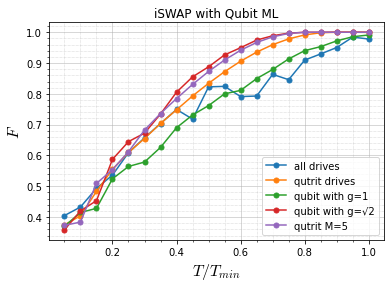

In [22]:
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",allDrives_DF,["all drives"])
genPlot("iSWAP Protocol with Qubit & Qutrit Drives",qutrits_DF,["all drives","qutrit drives"])
#genPlot("iSWAP Protocol with Qubit & Qutrit Drives",yquit_DF,["all drives","qutrit drives","Y drive"])
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2"])
genPlot("iSWAP with Qubit ML",iSWAP_M5,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2","qutrit M=5"])

Now we the saturation of the $g = \sqrt{2}$ plot using the qutrit protocol! 

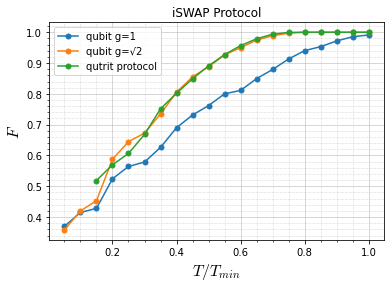

In [24]:
iSWAP_M8 = pd.read_csv("../Data/PastWendianData/Qutrit_iSWAP_iSWAP_Protocol_M8_qtd_g1.csv",names=["fidelity","time"])
iSWAP_M8.sort_values(by="time",inplace=True)
iSWAP_M8 = iSWAP_M8.reset_index().drop('index',axis=1).drop(index=[0])

iSWAP_allD8 = pd.read_csv("../Data/PastWendianData/Qutrit_iSWAP_iSWAP_Protocol_M8_all_g1.csv",names=["fidelity","time"])
iSWAP_allD8.sort_values(by="time",inplace=True)
iSWAP_allD8 = iSWAP_M8.reset_index().drop('index',axis=1).drop(index=[0])

genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
#genPlot("iSWAP 5 Segments",iSWAP_M8,["qutrit M=8"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2"])
genPlot("iSWAP Protocol",iSWAP_allD8,["qubit g=1","qubit g=\u221A2","qutrit protocol"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_Protocol.pdf"), format="pdf")

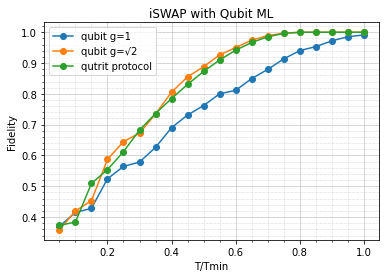

In [ ]:
genPlot("iSWAP with Qubit ML",qubits_DF,["qubit with g=1"])
genPlot("iSWAP with Qubit ML",qubits_gR2_DF,["all drives","qutrit drives","qubit with g=1","qubit with g=\u221A2"])
genPlot("iSWAP with Qubit ML",iSWAP_M5,["qubit g=1","qubit g=\u221A2","qutrit protocol"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_Comparison.pdf"), format="pdf")

## Figures for Dr. Simmonds' Summary

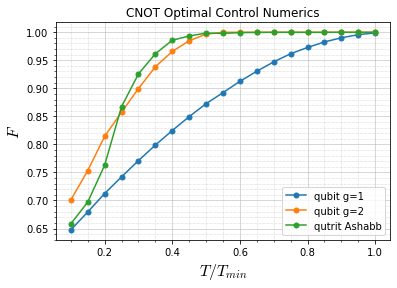

In [ ]:
CNOT_2DF = pd.read_csv("../Data/PastWendianData//Qubit_CNOT_XX_M8_all_g2.csv",names=["fidelity","time"])
CNOT_2DF.sort_values(by="time",inplace=True)
CNOT_2DF = CNOT_2DF.reset_index().drop('index',axis=1).drop(index=[0])

CNOT_ODF = pd.read_csv("../Data/PastWendianData/Qutrit_CNOT_Ashabb_Ones_M8_all_g1.csv",names=["fidelity","time"])
CNOT_ODF.sort_values(by="time",inplace=True)
CNOT_ODF = CNOT_ODF.reset_index().drop('index',axis=1).drop(index=[0])

genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"])
genPlot("CNOT Qubit",CNOT_2DF,["qutrit Ashabb","qubit g=1"])
genPlot("CNOT Optimal Control Numerics",CNOT_A_DF,["qubit g=1","qubit g=2","qutrit Ashabb"])
#genPlot("CNOT Optimal Control Numerics",CNOT_g3_DF,["qubit g=1","Ashabb coupling","qubit g=3"])
#plt.savefig(os.path.join(os.getcwd(),"Figures/","CNOT_Comparison.pdf"), format="pdf")

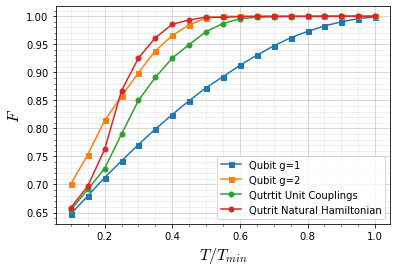

In [ ]:
CNOT_ODF = pd.read_csv("../Data/PastWendianData/Qutrit_CNOT_Ashabb_Ones_M8_all_g1.csv",names=["fidelity","time"])
CNOT_ODF.sort_values(by="time",inplace=True)
CNOT_ODF = CNOT_ODF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",CNOT_DF,["qubit g=1"],"s")
genPlot("CNOT Qubit",CNOT_2DF,["qutrit Ashabb","qubit g=1"],"s")
genPlot("CNOT Qubit",CNOT_ODF,["normalized Ashabb"])
genPlot("",CNOT_A_DF,["Qubit g=1","Qubit g=2","Qutrtit Unit Couplings","Qutrit Natural Hamiltonian"])
plt.savefig(os.path.join(os.getcwd(),"OptCompar.pdf"), format="pdf")

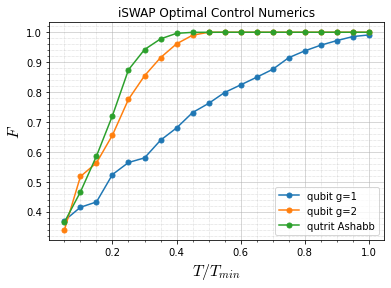

In [25]:
iSWAP_QB_DF = pd.read_csv("../Past_Files/Past_Data/RandomSeed_Output//iSWAP/iSWAP_Qubit.csv",names=["fidelity","time"])
iSWAP_A_DF = pd.read_csv("../Past_Files/Past_Data/RandomSeed_Output//iSWAP/iSWAP_Ashabb.csv",names=["fidelity","time"])
iSWAP_2DF = pd.read_csv("../Data/PastWendianData/Qubit_iSWAP_XX_M8_all_g2.csv",names=["fidelity","time"])

iSWAP_QB_DF.sort_values(by="time",inplace=True)
iSWAP_A_DF.sort_values(by="time",inplace=True)
iSWAP_2DF.sort_values(by="time",inplace=True)

genPlot("iSWAP Qubit with g=1",iSWAP_QB_DF,["foo"])
genPlot("iSWAP Qutrit with Ashabb Coupling",iSWAP_2DF,["qubit g=1","qutrit Ashabb"])
genPlot("iSWAP Optimal Control Numerics",iSWAP_A_DF,["qubit g=1","qubit g=2","qutrit Ashabb"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_Comparison.pdf"), format="pdf")

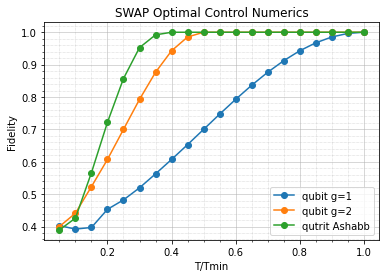

In [ ]:
SWAP_QB_DF = pd.read_csv("../RandomSeed_Output/SWAP/SWAP_Qubit.csv",names=["fidelity","time"])
SWAP_A_DF = pd.read_csv("../RandomSeed_Output/SWAP/SWAP_Ashabb.csv",names=["fidelity","time"])
SWAP_2DF = pd.read_csv("../ML_Output/Qubit_SWAP_XX_M8_all_g2.csv",names=["fidelity","time"])
SWAP_QB_DF.sort_values(by="time",inplace=True)
SWAP_A_DF.sort_values(by="time",inplace=True)
SWAP_2DF.sort_values(by="time",inplace=True)

genPlot("SWAP Qubit with g=1",SWAP_QB_DF,["foo"])
genPlot("SWAP Qutrit with Ashabb Coupling",SWAP_2DF,["qubit g=1","qubit g=2"])
genPlot("SWAP Optimal Control Numerics",SWAP_A_DF,["qubit g=1","qubit g=2","qutrit Ashabb"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","SWAP_Comparison.pdf"), format="pdf")

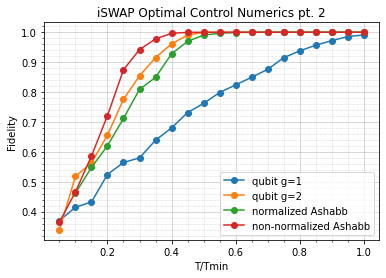

In [ ]:
iSWAP_ODF = pd.read_csv("../ML_Output/Qutrit_iSWAP_Ashabb_Ones_M8_all_g1.csv",names=["fidelity","time"])
iSWAP_ODF.sort_values(by="time",inplace=True)
iSWAP_ODF = iSWAP_ODF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",iSWAP_QB_DF,["qubit g=1"])
genPlot("SWAP Qutrit with Ashabb Coupling",iSWAP_2DF,["qubit g=1","qubit g=2"])
genPlot("CNOT Qubit",iSWAP_ODF,["normalized Ashabb"])
genPlot("iSWAP Optimal Control Numerics pt. 2",iSWAP_A_DF,["qubit g=1","qubit g=2","normalized Ashabb","non-normalized Ashabb"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","iSWAP_Comparison2.pdf"), format="pdf")

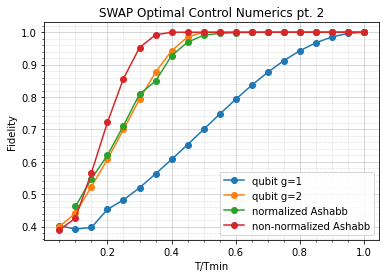

In [ ]:
SWAP_ODF = pd.read_csv("../ML_Output/Qutrit_iSWAP_Ashabb_Ones_M8_all_g1.csv",names=["fidelity","time"])
SWAP_ODF.sort_values(by="time",inplace=True)
SWAP_ODF = SWAP_ODF.reset_index().drop('index',axis=1).drop(index=[0])
genPlot("CNOT Qubit",SWAP_QB_DF,["qubit g=1"])
genPlot("SWAP Qutrit with Ashabb Coupling",SWAP_2DF,["qubit g=1","qubit g=2"])
genPlot("CNOT Qubit",SWAP_ODF,["normalized Ashabb"])
genPlot("SWAP Optimal Control Numerics pt. 2",SWAP_A_DF,["qubit g=1","qubit g=2","normalized Ashabb","non-normalized Ashabb"])
plt.savefig(os.path.join(os.getcwd(),"Figures/","SWAP_Comparison2.pdf"), format="pdf")